# ConvolutionalNeuralNetwork

## 全连接神经网络FNN与卷积神经网络CNN
全连接神经网络，一层一层的全部连接，也就是前一层的每一个节点都会和后面一层的所有节点进行连接。
全连接神经网络在数值计算的时候，会把信息拉成一维的，这样会丧失掉图片特征中的一些空间的信息。而卷积神经网络可以很好的保留图像的空间特征
全连接神经网络工作方式：
<img height="380" src="Picture/Model4FNN.png" width="700"/>
输入一张图像，先进行卷积操作，然后通过Subsampling下采样减少元素数量，降低运算的需求。 最终为了实现分类，输出还是一个10维的向量。中间的过程可以采样不同的方式
总的来看，首先经过卷积层，进行特征提取，经过特征提取之后，图片信息变成了一个向量；而后将向量接入一个全连接网络进行分类处理。
<img height="380" src="Picture/Model4CNN.png" width="700"/>
**卷积和下采样称为特征提取器(Feature Extraction)，全连接层作为分类器(Classification)。**
**卷积神经网络基本分为：Feature Extraction+Classification**


## 卷积运算
### 单通道卷积
**步骤**：
**1**在输入图像中，画出一个卷积核大小的（3x3）的窗口，而后将该窗口与卷积核做数乘+求（对应元素相乘）；
**2**将该窗口从左往右、从上到下做遍历，每一次都进行数乘求和运算；
**3**最终由这些数乘求和数值组成的矩阵，就是卷积后的结果

**例**：选择 1 x 5 x 5 的单通道图像，3 x 3 的卷积核，进行卷积运算

<img height="700" src="Picture/ConvolutionOne.png" width="700"/>

### 三通道卷积
对于输入图像，每一个通道都会配一个卷积核，也就是输入图像的通道数等于卷积核的通道数。
**步骤**：
1.每个通道根据上面讲的单通道的计算方式计算，得到一个矩阵，一共可以得到三个矩阵，
2.将这三个矩阵求和，最终得到的结果就是三通道卷积的结果。
**例**：
<img height="780" src="Picture/ConvolutionThree.png" width="700"/>

### 单通道输出
卷积核深度channel需等于输入深度（维度），一个卷积核得到一个输出通道
<img height="300" src="Picture/ConvolutionOutputOne.png" width="700"/>

### 多通道输出
**输入图像的通道数和卷积核的通道数一样；n：等于输入的维度**
**卷积核的个数和输出图像的通道数一样；m：等于卷积层内卷积核的个数**
<img height="310" src="Picture/ConvolutionOutputMulti.png" width="700"/>
构建一个卷积层，权重表示：
<img height="300" src="Picture/ConvoluteLayer.png" width="700"/>
**卷积核的**输入通道数（深度）与图像输入通道（深度）一致时卷积才起作用**

In [19]:
import torch

in_channels, out_channels = 5, 10
width, height = 100, 100
kernel_size = 3
batch_size = 1

inputs = torch.rand(batch_size,
                    in_channels,  # 输入通道数
                    width,
                    height)
conv_layer = torch.nn.Conv2d(in_channels,  # 输入通道
                             out_channels,  #输出通道
                             kernel_size=kernel_size  # 卷积核
                             )
outputs = conv_layer(inputs)
print(inputs.shape)
print(outputs.shape)
print(conv_layer.weight.shape)

torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


## 卷积运算其他参数权重
### 填充padding
**无padding**：我们输入一个5x5大小的输入图像，通过3x3的卷积核进行卷积，此时输出图像为3x3。
**padding作用**我们想要输出图像的大小和输入图像的大小是一样大，此时我们就需要进行对输入图像进行填充。
**例子**
1. 输入一个3x3大小的输入图像，使输出图像的大小和输入图像的大小一样，padding = 3/2 = 1，此时就需要在输入图像填充一圈使其变成7x7。
2. 输入5x5大小的卷积核进行卷积，使输出图像大小等于输入图像大小，此时我们需要填充padding = 5/2 = 2，填充2圈，使得原图像变成9x9。
<img height="200" src="Picture/Padding4Convolution.png" width="500"/>

tensor([[[[ 32.,  68.,  89., 101.,  78.],
          [ 87., 165., 210., 219., 162.],
          [141., 255., 291., 255., 156.],
          [114., 210., 219., 219., 141.],
          [143., 248., 224., 191.,  96.]]]], grad_fn=<ConvolutionBackward0>)


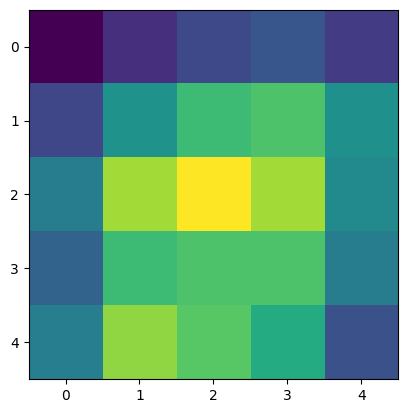

In [20]:
import torch
import matplotlib.pyplot as plt

data_input = [1, 2, 3, 4, 5,
              6, 7, 8, 9, 1,
              2, 3, 4, 5, 6,
              7, 8, 9, 1, 2,
              3, 4, 5, 6, 7]
# view内参数说明：
# B：batch_size
# C: 通道数
# W：图像或卷积核的宽度
# H：图像或卷积核的高度
# O: 输出通道数
# I：输入通道数
data_input = torch.Tensor(data_input).view(1, 1, 5, 5)  # B C W H
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
kernel = torch.Tensor([9, 8, 7, 6, 5, 4, 3, 2, 1]).view(1, 1, 3, 3)  # O I W H
conv_layer.weight.data = kernel.data  #将设定卷积核的送入到卷积层
outputs = conv_layer(data_input)
print(outputs)
plt.imshow(outputs.data[0][0])


### 步长Stride
卷积核窗口在遍历图像时，每走一步的步长。
从左到右、从上到下每次都是移动<stride>步。这个可以有效地降低特征图的宽度和高度
<img height="600" src="Picture/Stride4Convolution.png" width="500"/>

tensor([[[[165., 210., 219.],
          [255., 291., 255.],
          [210., 219., 219.]]]], grad_fn=<ConvolutionBackward0>)


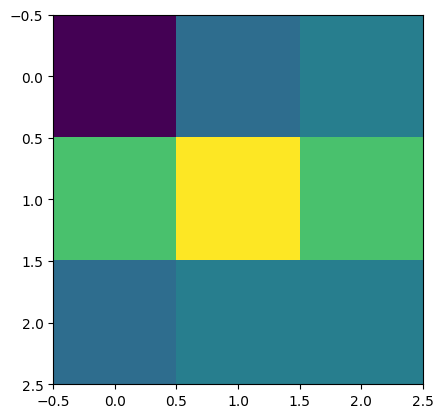

In [21]:
import torch
import matplotlib.pyplot as plt

data_input = [1, 2, 3, 4, 5,
              6, 7, 8, 9, 1,
              2, 3, 4, 5, 6,
              7, 8, 9, 1, 2,
              3, 4, 5, 6, 7]
# view内参数说明：
# B：batch_size
# C: 通道数
# W：图像或卷积核的宽度
# H：图像或卷积核的高度
# O: 输出通道数
# I：输入通道数
data_input = torch.Tensor(data_input).view(1, 1, 5, 5)  # B C W H
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, bias=False)
kernel = torch.Tensor([9, 8, 7, 6, 5, 4, 3, 2, 1]).view(1, 1, 3, 3)  # O I W H
conv_layer.weight.data = kernel.data  #将设定卷积核的送入到卷积层
outputs = conv_layer(data_input)
print(outputs)
plt.imshow(outputs.data[0][0])


### 池化Poling——下采样
**最大池化**它是没有权重的，2x2的池化默认stride=2。做最大池化，只是在一个通道内进行，不同的通道不会最大池化。
<img height="200" src="Picture/MaxPooling4Convolution.png" width="500"/>

tensor([[[[7., 9.],
          [8., 9.]]]])


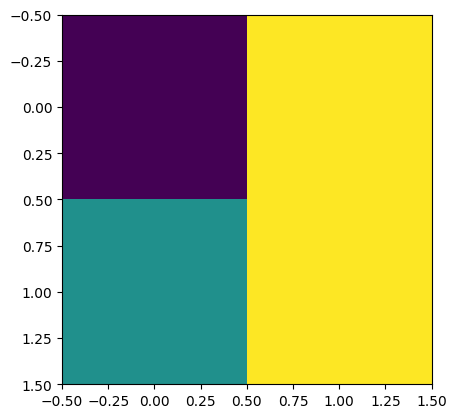

In [22]:
import torch
import matplotlib.pyplot as plt

data_input = [1, 2, 3, 4, 5,
              6, 7, 8, 9, 1,
              2, 3, 4, 5, 6,
              7, 8, 9, 1, 2,
              3, 4, 5, 6, 7]
# view内参数说明：
# B：batch_size
# C: 通道数
# W：图像或卷积核的宽度
# H：图像或卷积核的高度
data_input = torch.Tensor(data_input).view(1, 1, 5, 5)  # B C W H
max_pooling_layer = torch.nn.MaxPool2d(kernel_size=2)
outputs = max_pooling_layer(data_input)
print(outputs)
plt.imshow(outputs.data[0][0])

## 简单的卷积神经网络
1. 选择 5 x 5 的卷积核，输入通道为 1，输出通道为 10：此时图像矩阵经过 5 x 5 的卷积核后会小两圈，也就是4个数位，变成 24 x 24，输出通道为10；
2. 选择 2 x 2 的最大池化层：此时图像大小缩短一半，变成 12 x 12，通道数不变；
3. 再次经过 5 x 5 的卷积核，输入通道为 10，输出通道为 20：此时图像再小两圈，变成 8 *8，输出通道为20；
4. 再次经过 2 x 2 的最大池化层：此时图像大小缩短一半，变成 4 x 4，通道数不变；
5. 最后将图像整型变换成向量，输入到全连接层中：输入一共有 4 x 4 x 20 = 320 个元素，输出为 10.

<img height="300" src="Picture/SimpleConvolutionalNeuralNetwork.png" width="700"/>

5x5的卷积核就是少两圈，也就是图像大小-4

<img height="400" src="Picture/SimpleConvolutionalNeuralNetworkModel.png" width="700"/>


## Pytorch 使用GPU加速
### 模型建立后，网络模型迁移到GPU上面进行训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
### 训练时：输入的数据放到同一块显卡上，Training
input, target = input.to(device), target.to(device)
### 测试时，输入的数据放到同一块显卡上，Testing
 input, target = input.to(device),target.to(device)
### 训练测试时也可以将loss放在显卡是

## 减少代码冗余
**面向过程**：使用函数
**面向对象**：使用类

# GoogLeNet
## Inception
inception模块的构成方式其实有很多种，这只是其中的一种:
### 首先需要知道inception为什么这样构建？
因为构建的时候有一些超参数是比较难选的，比如卷积核的大小，是使用3x3，还是5x5还是使用其他的方式，GooleNet的出发点就是不知道哪个卷积核好用，那么就在一个块里面把卷积核都使用一下，然后把他们结果挪到一起，之后如果3x3的好用，自然3x3的权重就会变得比较大，其他路线的权重相对就会变得更小，所以这是提供了几种后续的神经网络的配置，然后通过训练自动的找到最优的卷积的组合，这是GoogleNet设计的灵感。
<img height="600" src="Picture/IncetionModule4GoogLeNet.png" width="700"/>

**Concatenate**：把张量拼接到一块。4条路径算出来4个张量，所以肯定要做一个拼接。